<a href="https://colab.research.google.com/github/F404F/Digital-Signal-Processing/blob/main/Trabalho-1-Processamento-de-Voz/DSP_Trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EEL7522-06202 (20201) - Processamento Digital de Sinais

##Felipe Castro de Freitas - 14209569

###Projeto Processamento de Voz

**Este projeto individual visa estudar algoritmos de processamento de sinais e aplicá-los em filtragem e reconhecimento de voz.**



###Importação das bibliotecas necessárias

In [1]:
!pip install pydub      # splitting audio files and stuff

from io import BytesIO
from google.colab import files
import tempfile
import wave
import requests
import numpy as np
import scipy.signal as sg
import scipy.io.wavfile
import pydub
import matplotlib.pyplot as plt
from IPython.display import Audio, display
%matplotlib inline

###Conversão MP3 -> WAV para uso como array

In [2]:
def speakMP3(data):
    # We convert the mp3 bytes to wav.
    audio = pydub.AudioSegment.from_mp3(BytesIO(data))
    with tempfile.TemporaryFile() as fn:
        wavef = audio.export(fn, format='wav')
        wavef.seek(0)
        wave = wavef.read()
    # We get the raw data by removing the 24 first
    # bytes of the header.
    #x = np.frombuffer(wave, np.int16)[24:] / 2.**15
    x = np.frombuffer(wave, np.int16)[24:] #/ 2.**15  -> normalização removida do array pois os filtros nao estavam respondendo apropriadamente
    return x, audio.frame_rate

###Utilização do arquivo em WAV como array

In [3]:
def speak(data):
    audio = pydub.AudioSegment.from_wav(BytesIO(data))
    samples = np.frombuffer(audio.raw_data, np.int16)[24:] #/ 2.**15  -> normalização removida do array pois os filtros nao estavam respondendo apropriadamente

    return samples, audio.frame_rate

###Função para Reprodução do arquivo

In [4]:
def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

###Arquivo de Voz hospedado no Github e seu gráfico

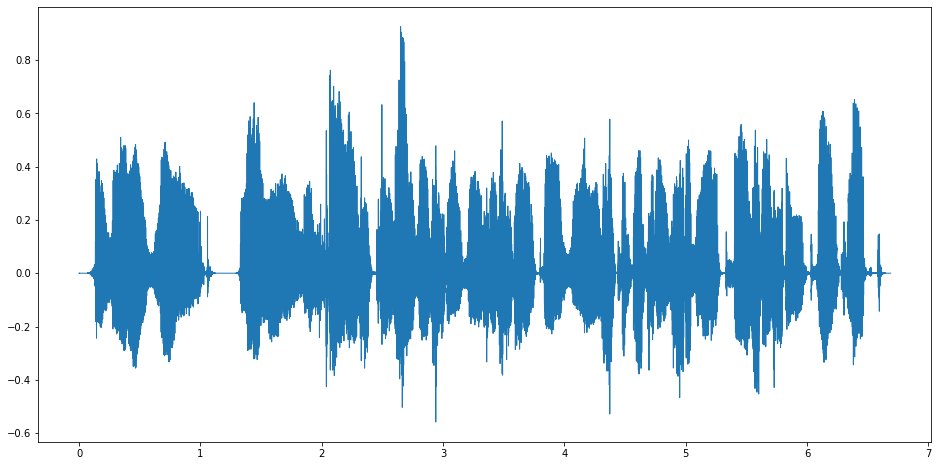

In [5]:
url = ('https://github.com/F404F/'
       'Digital-Signal-Processing/blob/main/'
       'Trabalho-1-Processamento-de-Voz/'
       'Alice16PCM.wav?raw=true')
voiceAlice = requests.get(url).content
xAlice, frAlice = speak(voiceAlice)
play(xAlice/2**15, frAlice)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
tAlice = np.linspace(0., len(xAlice) / frAlice, len(xAlice))
ax.plot(tAlice, xAlice/2**15, lw=1)



Esse arquivo de voz foi gerado a partir de um programa Text to Speach

###1) Filtragem com esquecimento 

Usando α=0,98,0,5,−0,98,−0,5. Salve cada resultado do processamento em arquivos no formato wav usando o wavwrite. (Help wavwrite) do Scilab. Usando o Audacity, ouça os resultados e comente no relatório. Com o Audacity observe os gráficos de espectros dos sinais e os inclua no relatório. Inclua o programa fonte no relatório. Teste com outros valores de α e comente os resultados no relatório.

###Algoritmo e Função do Filtro de Esquecimento

In [6]:
def FiltroEsquecimento (input, alfa):
  output = np.empty_like(input)
  # output = []
  for i in range(len(input)):
    if i == 0:
      output[i] = input[i]
      # output.append(input[i])
    else: 
      output[i] = (alfa * output[i-1]) + input[i]
      # output.append((alfa*output[i-1]) + input[i])
  return output
  # TODO: impedir |alfa| > 1 e alfa = 0 

###Entrada do filtro x Saída do filtro para alfa = 0.98

Áudio Original




Áudio Após filtragem



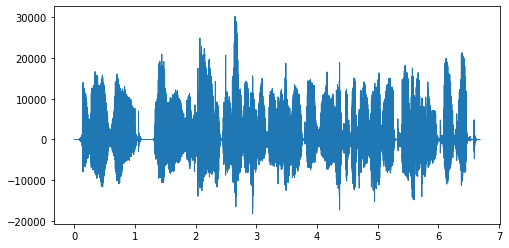

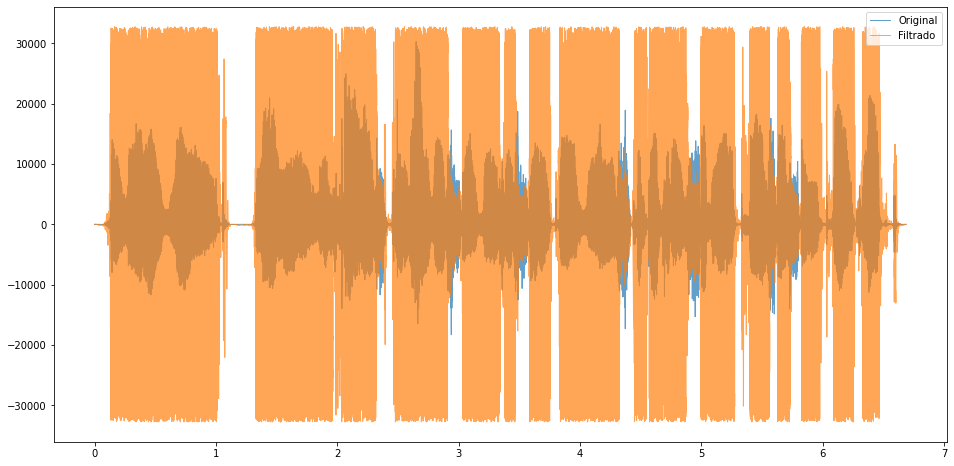

In [7]:
print("Áudio Original")
print("")
play(xAlice, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(tAlice, xAlice, lw=1)

outFiltro = FiltroEsquecimento(xAlice, 0.98)

print("Áudio Após filtragem")
print("")
play(outFiltro, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(tAlice, xAlice, lw=1, alpha=.7, label="Original")
ax.plot(tAlice, outFiltro, lw=1, alpha=.7, label="Filtrado")
leg = ax.legend(loc='upper right')


###Entrada do filtro x Saída do filtro para alfa = -0.98

Áudio Original




Áudio Após filtragem



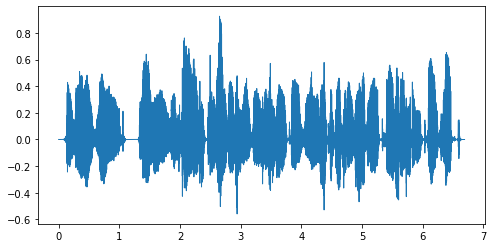

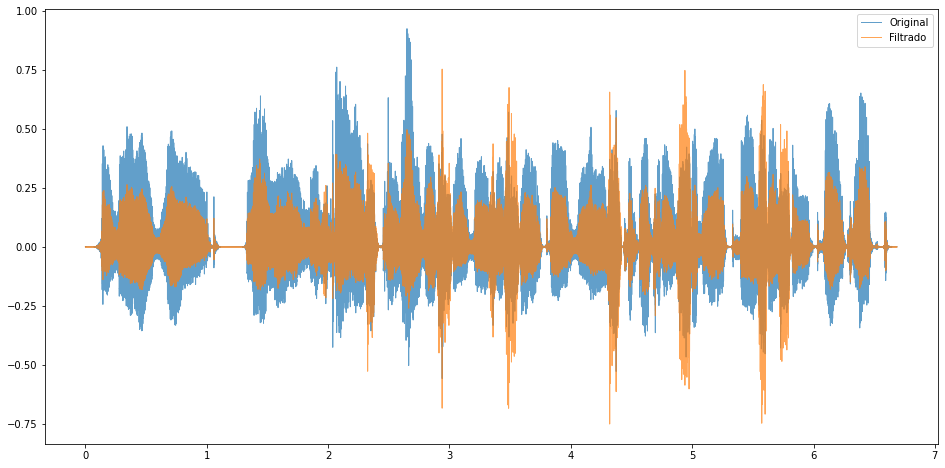

In [8]:
print("Áudio Original")
print("")
play(xAlice, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(tAlice, xAlice/2**15, lw=1)

outFiltro = FiltroEsquecimento(xAlice, -0.98)

print("Áudio Após filtragem")
print("")
play(outFiltro, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(tAlice, xAlice/2**15, lw=1, alpha=.7, label="Original")
ax.plot(tAlice, outFiltro/2**15, lw=1, alpha=.7, label="Filtrado")
leg = ax.legend(loc='upper right')


###Entrada do filtro x Saída do filtro para alfa = 0.5

Áudio Original




Áudio Após filtragem



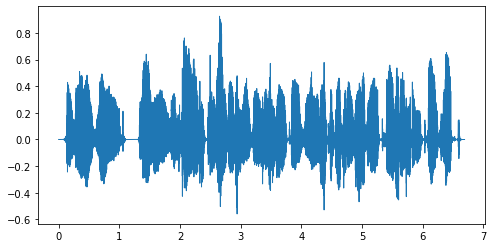

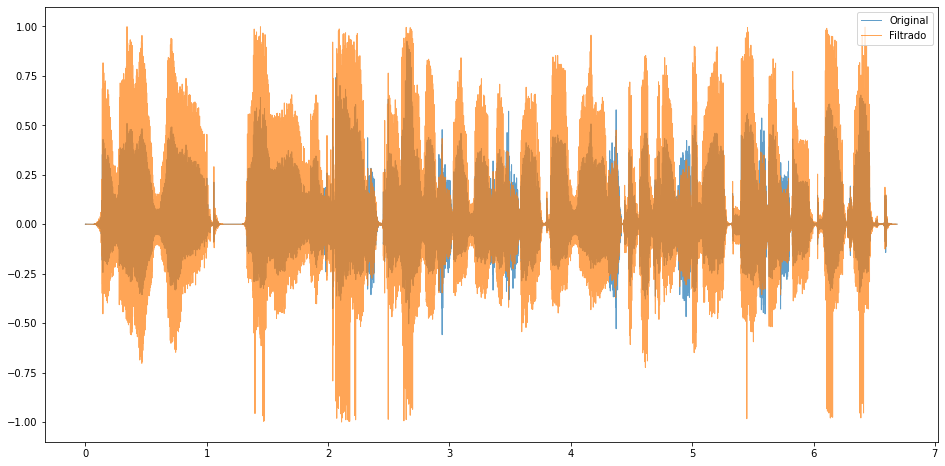

In [9]:
print("Áudio Original")
print("")
play(xAlice, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(tAlice, xAlice/2**15, lw=1)

outFiltro = FiltroEsquecimento(xAlice, 0.5)

print("Áudio Após filtragem")
print("")
play(outFiltro, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(tAlice, xAlice/2**15, lw=1, alpha=.7, label="Original")
ax.plot(tAlice, outFiltro/2**15, lw=1, alpha=.7, label="Filtrado")
leg = ax.legend(loc='upper right')


###Entrada do filtro x Saída do filtro para alfa = -0.5

Áudio Original




Áudio Após filtragem



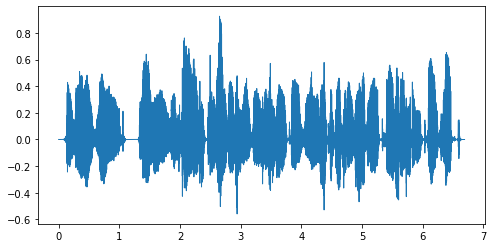

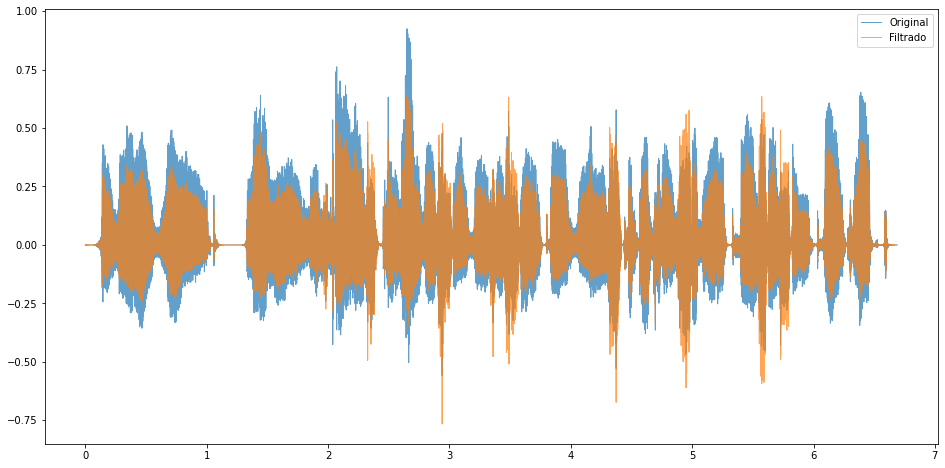

In [10]:
print("Áudio Original")
print("")
play(xAlice, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(tAlice, xAlice/2**15, lw=1)

outFiltro = FiltroEsquecimento(xAlice, -0.5)

print("Áudio Após filtragem")
print("")
play(outFiltro, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(tAlice, xAlice/2**15, lw=1, alpha=.7, label="Original")
ax.plot(tAlice, outFiltro/2**15, lw=1, alpha=.7, label="Filtrado")
leg = ax.legend(loc='upper right')


###Entrada do filtro x Saída do filtro para alfa = 0.1

Áudio Original




Áudio Após filtragem



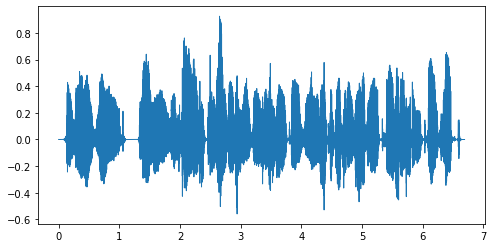

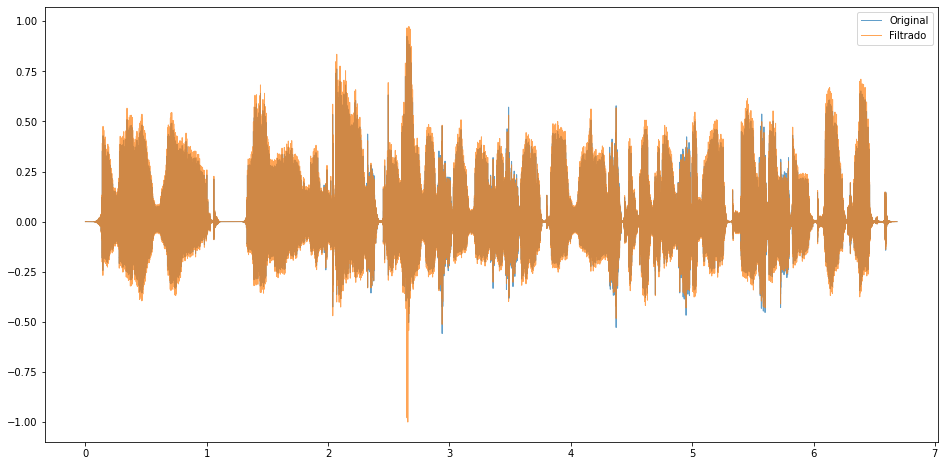

In [11]:
print("Áudio Original")
print("")
play(xAlice, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(tAlice, xAlice/2**15, lw=1)

outFiltro = FiltroEsquecimento(xAlice, 0.1)

print("Áudio Após filtragem")
print("")
play(outFiltro, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(tAlice, xAlice/2**15, lw=1, alpha=.7, label="Original")
ax.plot(tAlice, outFiltro/2**15, lw=1, alpha=.7, label="Filtrado")
leg = ax.legend(loc='upper right')


###Entrada do filtro x Saída do filtro para alfa = -0.1

Áudio Original




Áudio Após filtragem



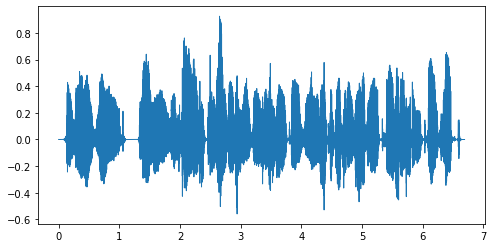

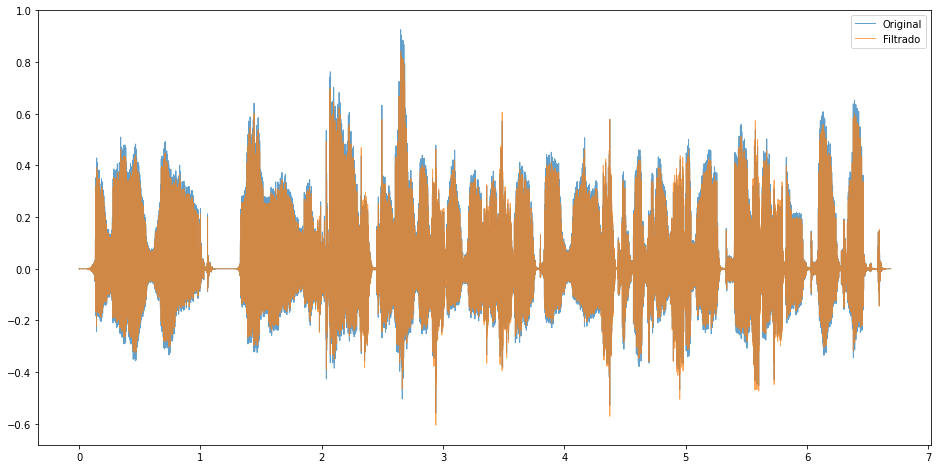

In [12]:
print("Áudio Original")
print("")
play(xAlice, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(tAlice, xAlice/2**15, lw=1)

outFiltro = FiltroEsquecimento(xAlice, -0.1)

print("Áudio Após filtragem")
print("")
play(outFiltro, frAlice)
print("")

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(tAlice, xAlice/2**15, lw=1, alpha=.7, label="Original")
ax.plot(tAlice, outFiltro/2**15, lw=1, alpha=.7, label="Filtrado")
leg = ax.legend(loc='upper right')


###Observações sobre os resultados

Para alfa = 0.98: o áudio fica distorcido (aspecto de "estourado") devido aos valores das amostras alcançarem valores muito próximos dos limites (arquivo WAV com 16bits de resolução possui amostras de valores inteiros entre −32.768 e 32.767), o que é observável no gráfico.

Para alfa = -0.98: percebe-se uma atenuação do sinal de saída apra aproximadamente metade do valor de amplitude das amostras em relação ao sinal de entrada.

Para alfa = 0.5: há um aumento no volume sonoro do sinal de saída (um ganho de aproximadamente 2) com pequenas distorções nos pontos em que os valores de amostras do sinal original eram próximos dos limites da resolução.

Para alfa = -0.5: a diferença audivel entre os sinais é imperceptivel, mas apartir dos gráficos percebe-se que o sinal de saída sofre uma diminuição, tornando-se aproximadamente 75% do sinal de entrada.

Para alfa = 0.1: um aumento de 10% na forma de onda do sinal de saída, com apenas um pequeno ponto de distorção entre 2 e 3 segundos que é possivel perceber via áudio e via gráfico.

Para alfa = -0.1: uma diminuição de 10% no valor de saída, extremamente similar ao sinal de entrada quanto a sonoridade e graficamente.

###2) Filtragem de média móvel 

Usando M = 50, 100, 1000. Salve cada resultado do processamento em arquivos no formato wav usando o wavwrite. (Help wavwrite) do Scilab. Usando o Audacity, ouça os resultados e comente o que observou no relatório.  Com o Audacity observe os gráficos de espectros dos sinais e os inclua no relatório. Inclua o programa fonte no relatório. Teste com outros valores de M e comente os resultados no relatório.


### Algoritmo e Função do Filtro de Média móvel

In [13]:
def FiltroMediaMovel (input, M):
  output = np.empty(len(input))
  for i in range(len(input)):
    if i == 0:
      output[i] = input[i]/M
      # output.append(input[i]/M)
    elif i < M:
      output[i] = output[i-1] + (input[i]/M)
      # output.append(output[i-1] + input[i]/M)
    else: 
      output[i] = output[i-1] + ((input[i] - input [i-M])/M)
      # output.append(output[i-1] + (input[i] - input[i-M])/M)
# TODO: impedir M abaixo de 1 ou Numeros fracionários
  return output

###Entrada do filtro x Saída do filtro para M = 50 

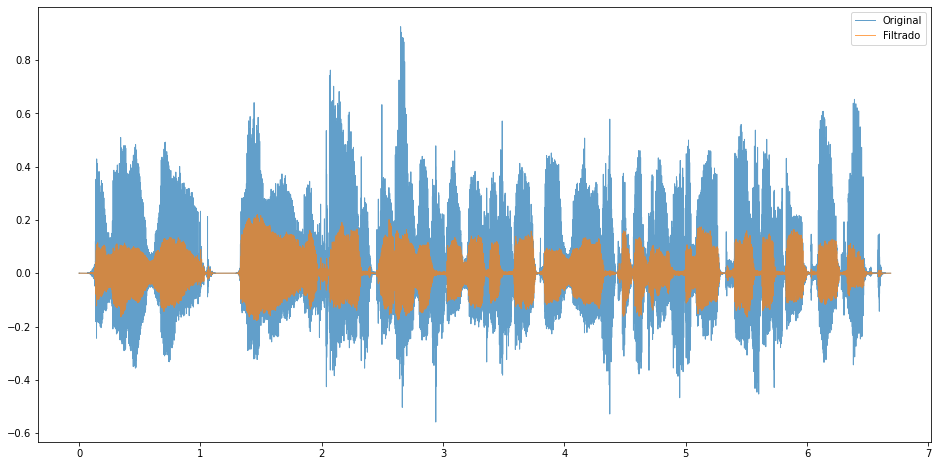

In [14]:

# Funções de escrita de arquivo e download 
# scipy.io.wavfile.write("mm50.wav", frAlice, np.array(outFiltro))
# files.download("mm50.wav")

# fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(tAlice, xAlice/2**15, lw=1)

xAliceNorm = (xAlice / 2**15) #+ 0.01 * np.random.normal(0,1,size=len(xAlice))
outFiltro = FiltroMediaMovel(xAliceNorm, 50)

# Player interativo (Nao funciona corretamente para sinais baixos)

# url = ('https://github.com/F404F/Digital-Signal-Processing/blob/main/Trabalho-1-Processamento-de-Voz/mm50.wav?raw=true')
# mm50 = requests.get(url).content
# xmm50, frmm50 = speak(mm50)
# # play(xmm50, frmm50)

# print("Áudio Original")
# print("")
# play(xAlice, frAlice)
# print("")

# print("Áudio Após filtragem")
# print("")
# display(Audio(url='https://github.com/F404F/Digital-Signal-Processing/blob/main/Trabalho-1-Processamento-de-Voz/mm50.wav')
# play(xmm50/2**15, frmm50)
# print("")

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(tAlice, xAliceNorm, lw=1, alpha=.7, label="Original")
ax.plot(tAlice, outFiltro, lw=1, alpha=.7, label="Filtrado")
leg = ax.legend(loc='upper right')


###Entrada do filtro x Saída do filtro para M = 100 

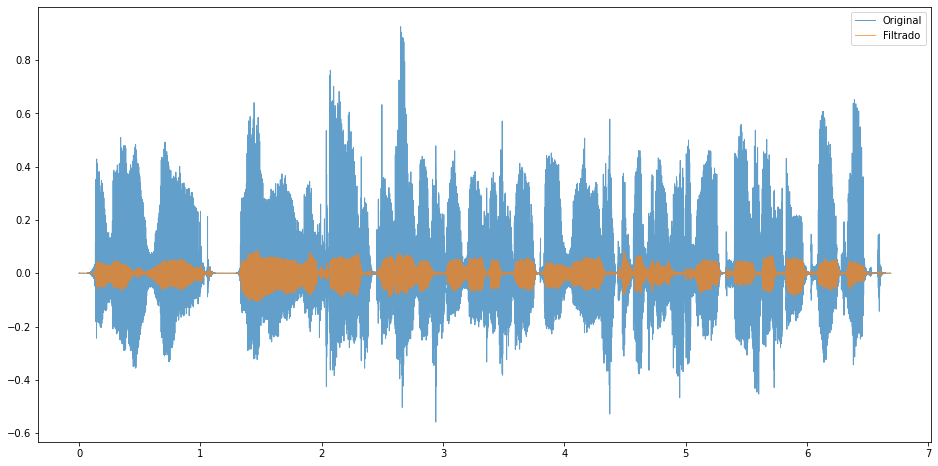

In [15]:

# fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(tAlice, xAlice/2**15, lw=1)

xAliceNorm = xAlice / 2**15
outFiltro = FiltroMediaMovel(xAliceNorm, 100)

# Download do arquivo
# scipy.io.wavfile.write("mm100.wav", frAlice, np.array(outFiltro))
# files.download("mm100.wav")

# Player de áudio
# print("Áudio Original")
# print("")
# play(xAlice, frAlice)
# print("")

# print("Áudio Após filtragem")
# print("")
# play(outFiltro, frAlice)
# print("")

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(tAlice, xAliceNorm, lw=1, alpha=.7, label="Original")
ax.plot(tAlice, outFiltro, lw=1, alpha=.7, label="Filtrado")
leg = ax.legend(loc='upper right')


###Entrada do filtro x Saída do filtro para M = 500

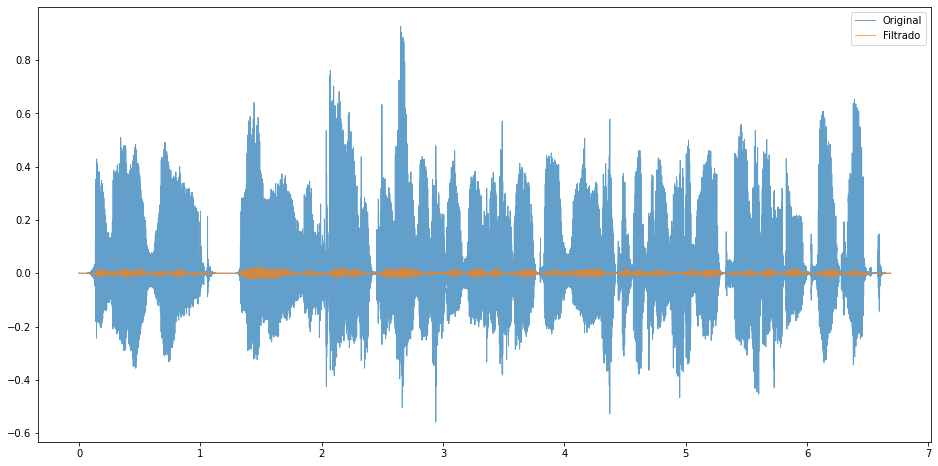

In [16]:

# fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(tAlice, xAlice/2**15, lw=1)

xAliceNorm = xAlice / 2**15
outFiltro = FiltroMediaMovel(xAliceNorm, 500)
# Download do arquivo
# scipy.io.wavfile.write("mm500.wav", frAlice, np.array(outFiltro))
# # files.download("mm500.wav")

# Player de Áudio
# print("Áudio Original")
# print("")
# play(xAlice, frAlice)
# print("")

# print("Áudio Após filtragem")
# print("")
# play(outFiltro, frAlice)
# print("")

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(tAlice, xAliceNorm, lw=1, alpha=.7, label="Original")
ax.plot(tAlice, outFiltro, lw=1, alpha=.7, label="Filtrado")
leg = ax.legend(loc='upper right')


###Entrada do filtro x Saída do filtro para M = 1000 

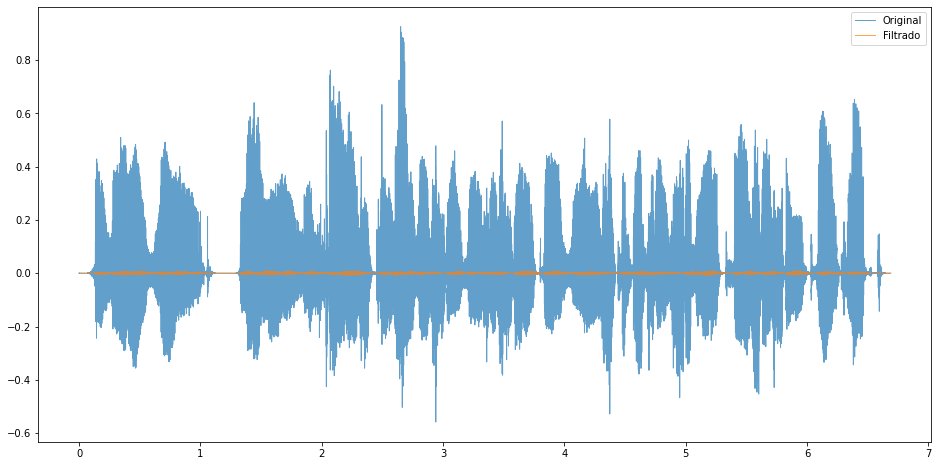

In [17]:

# fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(tAlice, xAlice/2**15, lw=1)

xAliceNorm = xAlice/2**15
outFiltro = FiltroMediaMovel(xAliceNorm, 1000)
outFiltroUNorm = np.int16(outFiltro * (2**15))

# Download do arquivo
# scipy.io.wavfile.write("mm1000.wav", frAlice, np.array(outFiltro))
# files.download("mm1000.wav")

# Player de áudio
# print("Áudio Original")
# print("")
# play(xAlice, frAlice)
# print("")

# print("Áudio Após filtragem")
# print("")
# # play(outFiltroUNorm, frAlice)

# display(Audio(filename="mm1000.wav"))
# print("")

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(tAlice, xAlice/2**15, lw=1, alpha=.7, label="Original")
ax.plot(tAlice, outFiltroUNorm/2**15, lw=1, alpha=.7, label="Filtrado")
leg = ax.legend(loc='upper right')


###Observações sobre os resultados

Como padrão todos os sinais foram ouvidos nas mesmas condições de volume (15%) para se avaliar a influência do filtro.

Para M = 50: o som se torna mais suave, porém com aspecto de "abafado", com volume reduzido como se estivese a uma distância do microfone. Pelo gráfico percebe-se a ausência dos picos, principalmente entre 2 e 3 segundos.

Para M = 100: ainda mais longe e mais baixo que com M=50, com nível de reprodução em -19dB aproximadamente.

Para M = 500: extremamente baixo, com nível de reprodução em -33dB, é possivel distinguir algumas palavras e fonemas mas dificilmente a frase toda.

Para M = 1000: O som é praticamente inaudível (-41dB), se assemelhando a uma gravação de microfone sem estímulo sonoro ("silêncio").

Nota: o player interno utilizado anteriormente no Jupyter Notebook via função:

```
def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))
```
normaliza todos os arrays de entrada por padrão, dificultando a observação dos sinais de maneira sonora, adulterando a experiência sonora real quando comparada com o arquivo executado pelo Audacity. 

Todas as observações aqui foram feitas a partir dos sinais ouvidos no Audacity, e todos os arquivos gerados estão disponíveis no GitHub.


###3) Correlação de sinais.  

Segmente um trecho do sinal (aproximadamente 1 segundos) do meio do sinal, entre  2 e 3 segundos do sinal de voz. Calcule a função correlação entre o segmento com o sinal de voz e apresente o gráfico da correlação no relatório. Comente  no relatório como você poderia usar esta função de correlação para identificar o locutor. Comente no relatório como estimar qual a palavra que foi falada no segmento dentro das palavras ditas na frase toda do áudio. Comente no relatório  se usar algum filtro antes da correlação poderia ajudar no processamento ? 

Teste esta hipótese com os filtros desenvolvidos e comente no relatório os resultados. Inclua o programa fonte no relatório.

### Extração do segmento do sinal de voz

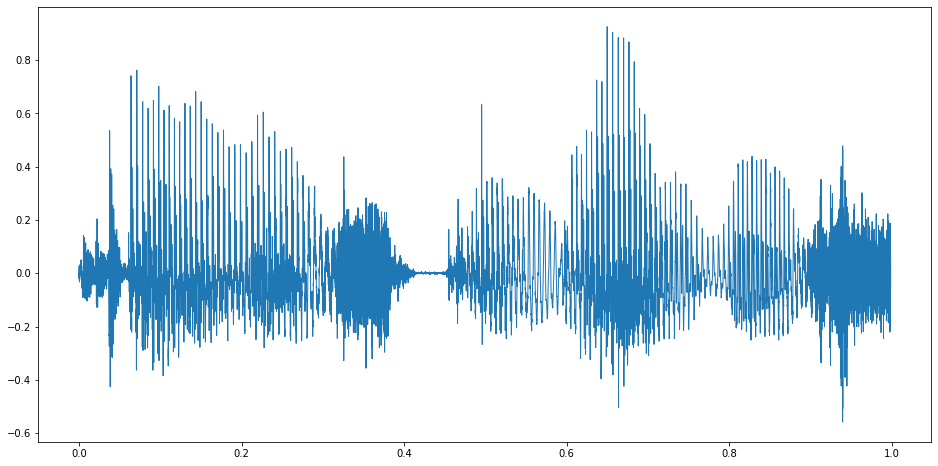

In [18]:
def slicewave(data):
    audio = pydub.AudioSegment.from_wav(BytesIO(data))
    audioslice = audio[2000:3000]
    samples = np.frombuffer(audioslice.raw_data, np.int16)[24:]/2**15
# Similar para o arquivo MP3, porem conversão foi omitida (trabalhado com o arquivo WAV já disponível)
    return samples, audio.frame_rate

url = ('https://github.com/F404F/'
       'Digital-Signal-Processing/blob/main/'
       'Trabalho-1-Processamento-de-Voz/'
       'Alice16PCM.wav?raw=true')
voiceAliceSlice = requests.get(url).content
xAliceSlice, frAliceSlice = slicewave(voiceAliceSlice)
play(xAliceSlice, frAliceSlice)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
tAliceSlice = np.linspace(0., len(xAliceSlice) / frAliceSlice, len(xAliceSlice))
ax.plot(tAliceSlice, xAliceSlice, lw=1)



###Utilizando a função de correlação dada pela biblioteca do SciPy

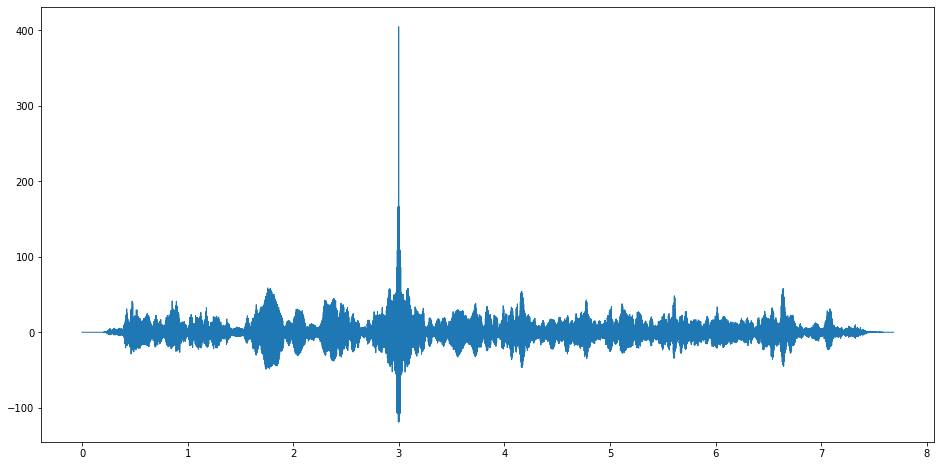

In [19]:
xAliceCorrelate = sg.correlate(xAlice/2**15, xAliceSlice,mode='full', method='direct')

play(xAliceCorrelate,frAlice)

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
tAliceCorrelate = np.linspace(0., len(xAliceCorrelate) / frAlice, len(xAliceCorrelate))
ax.plot(tAliceCorrelate, xAliceCorrelate, lw=1)

A função de correlação busca similaridade entre os sinais, alcançando seu pico quando o sinal que foi segmentado encontra a janela de seu segmento, isso é, quando o segmento se sobrepõe ao local original perfeitamente, temos o pico observado em 3 segundos conforme o gráfico.

###Aprendizado sobre as ferramentas utilizadas

Utilizando a linguagem Python e as bibliotecas matemáticas e de manipulação de arquivos, é possivel processar os arquivos de voz através da plataforma Google Colab, utilizando o poder de processamento de nuvem para entregar os resultados de forma rápida e independente de instalações de diversos programas e/ou hardware(computador) utilizado.

Há infinitas possibilidades de integração com outros projetos, como por exemplo projetos de Machine Learning / Deep Learning para processamento de voz, conversão de textos e arquivos PDF em audiobooks.



##Referências e links externos

Exemplo base para o projeto:

https://ipython-books.github.io/116-applying-digital-filters-to-speech-sounds/

Documentação das bibliotecas:

https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html

https://docs.scipy.org/doc/scipy/reference/signal.html

https://colab.research.google.com/github/hlecuanda/jupyter-notebooks-of-all-kinds/blob/master/InSoc.ipynb#scrollTo=rukI1gWikp5i

Github com os arquivos utilizados:

https://github.com/F404F/Digital-Signal-Processing/tree/main/Trabalho-1-Processamento-de-Voz

Projeto de conversão de PDF em audiobooks:

https://www.youtube.com/watch?v=q-nvbuc59Po
